In [13]:
data_path = '../data/'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import KernelPCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import hdbscan
sns.set_style('darkgrid')


%matplotlib inline

In [19]:
def pca(df, n = 10,scale = True,):
    if scale:
        df = Normalizer().fit_transform(df)
        
    pca = PCA(n)
    n_data = pca.fit_transform(df)
    # ploting the explained varianec
    cumsum = np.cumsum(pca.explained_variance_ratio_)
    
    plt.plot(np.arange(1,len(cumsum)+1), cumsum,  marker= 'o')
    plt.xticks(np.arange(1,len(cumsum)+1))
    plt.axhline(y = cumsum[-1], color = 'r')
    plt.text(x = 2,y = cumsum[-1] -.0523 , s = 'exp-var =  {:.3}'.format(cumsum[-1]), fontdict={'color':'b','fontsize':12})
    plt.title('pca components vs explained variance', fontsize = 16, color = 'r')
    plt.xlabel('N-Components',fontsize = 14, color = 'r')
    plt.ylabel('Explained Variance',fontsize = 14,color = 'r' );
   
    return n_data

####################################################################
def hieraricial(df):
    l = linkage(df, method= 'complete')
    plt.figure(figsize = (18,13))
    dendrogram(l);
####################################################################    
def kmeans(df, k = 3,):
    '''
    this function performs kmeans clustring, draws elbow method, plots classes count, plots tsne
    '''
    kmeans = KMeans(n_clusters= k, max_iter=500).fit(df)
    labels = kmeans.labels_
    
    intertia = []
    for i in range(1,30):
        km = KMeans(n_clusters=i).fit(df)
        intertia.append(km.inertia_)
    
    # plotting within class inertia (elbo method)
    fig, axs = plt.subplots(nrows= 1, ncols=2, figsize=(14,8))
    axs[0].plot(range(1,30), intertia, marker = 'x')
    axs[0].set_title('Elbow method', fontsize = 14, color = 'r')
    axs[0].set_xlabel('Components', fontsize = 12, color = 'r')
    axs[0].set_ylabel('Intertia', fontsize = 12, color = 'r')
    axs[0].set_xticks(range(1,30));
    
    # plotting the classes count
    
    sns.countplot(x = labels,palette='viridis', ax= axs[1])
    plt.xlabel('K-means Clusters',fontsize = 12, color = 'r')
    plt.title('count per class', fontsize = 14, color = 'r');
    
    return labels
#####################################################################333

def dbscan(df, eps, min_samples = 30):
    dbscan = DBSCAN(eps = eps, min_samples= min_samples).fit(df)
    dblabels = dbscan.labels_
    
    #plot dbscan clusters count
    sns.countplot(x = dblabels)
    # plt.xticks(['noise','0','1','2','3'])
    plt.xlabel('clusters' , fontsize = 14);
    return dblabels
##############################################################################

def plot_tsne_2d(data, clusters_labels, who = 'K-Means' , perform_tsne= False):
    '''
    plot tsne rsults if not done perform tsne
    parmas:
        data : ndarray tsne data result/ df to perform tsne on
        cluster_labels : 1D array it data is tsne result else it is none
        perform_tsne: bool default False if true it will perform tsne on the data
    '''
    if perform_tsne:
        tsne_data = TSNE(init= 'pca', ).fit_transform(data)
    else:
        tsne_data = data
    
    plt.figure(figsize=(13,13))
    sns.scatterplot(tsne_data[:,0],tsne_data[:,1] , c= clusters_labels)
    plt.title('TSNE with '+ who+ ' clustering results', fontsize = 16, color = 'r')
    if perform_tsne:
        return tsne_data
####################################################################################
def EM_model(df, n = 3):
    gmm  = GaussianMixture(n_components= n).fit(df)
    labels = gmm.predict(df)
    return labels

In [15]:
df = pd.read_csv(data_path + 'log_data.csv', index_col='CUST_ID')

# HDBSCAN

In [26]:
hdb = hdbscan.HDBSCAN(min_samples= 5, min_cluster_size = 100).fit(df)
labels = hdb.labels_

/home/mahmoud/anaconda3/envs/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


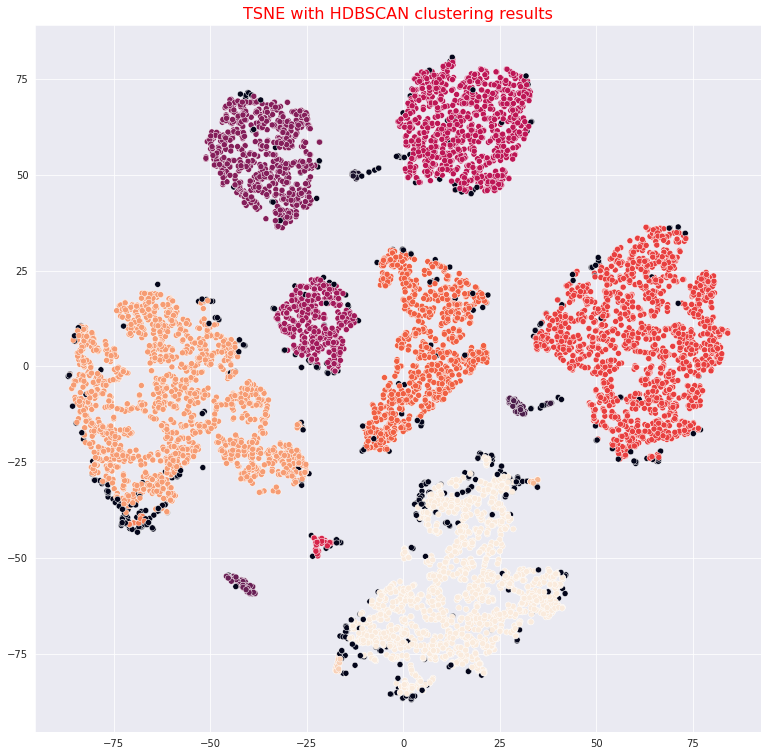

In [22]:
# hdbscan fro this parameters (min_samples= 5, min_cluster_size = 10)
tsne_data = plot_tsne_2d(df, labels, 'HDBSCAN', perform_tsne= True)

/home/mahmoud/anaconda3/envs/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


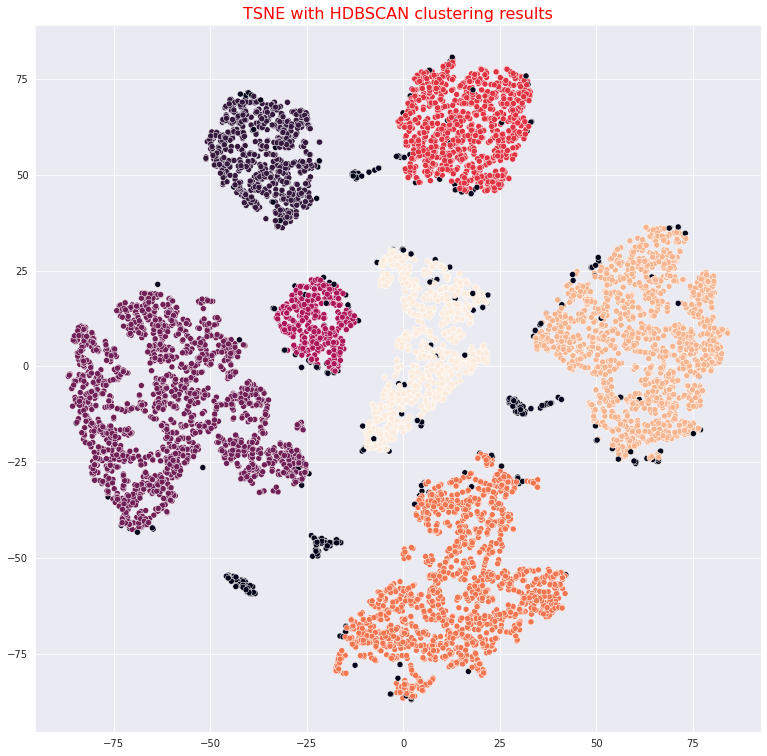

In [28]:
# hdbscan fro this parameters (min_samples= 5, min_cluster_size = 100)
plot_tsne_2d(tsne_data, labels, 'HDBSCAN', )

# Conclusion
### HDBSCAN:  is better than hdbscan with small tuning of parameters it detected all points we condsider noise as per the above plot